## Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import optuna
from geopy.distance import geodesic
import shap
from sklearn.metrics import recall_score
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from tqdm.notebook import tqdm
import requests
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv(r"C:\work\Всерос_3\иннополис/train_dataset_train.csv")
test = pd.read_csv(r"C:\work\Всерос_3\иннополис/test_dataset_test.csv")

In [3]:
df=train.drop(['id','.geo','area'],axis=1)
pd.pivot_table(df, index=['crop'],aggfunc='median').T.head(45)

crop,0,1,2,3,4,5,6
nd_mean_2021-04-15,0.202214,0.061548,0.064335,0.218432,0.152569,0.258218,0.059162
nd_mean_2021-04-16,0.233676,0.063651,0.216415,0.067117,0.195059,0.236643,0.063133
nd_mean_2021-04-18,0.195290,0.056116,0.060100,0.251321,0.135965,0.271515,0.065791
nd_mean_2021-04-19,0.061278,0.067605,0.110954,0.149927,0.133900,0.054991,0.176383
nd_mean_2021-04-20,0.064585,0.063917,0.060030,0.245305,0.064365,0.273586,0.067988
nd_mean_2021-04-22,0.148236,0.190592,0.166017,0.063736,0.197187,0.071063,0.132629
nd_mean_2021-04-23,0.067011,0.060327,0.061917,0.127266,0.060537,0.069481,0.067588
nd_mean_2021-04-25,0.053528,0.062130,0.053478,0.106341,0.120927,0.048715,0.112104
nd_mean_2021-04-26,0.236333,0.076336,0.256824,0.067673,0.182836,0.187359,0.218780
nd_mean_2021-04-27,0.063162,0.101386,0.067320,0.057944,0.088926,0.062523,0.068221


In [4]:
import re
def data_preprocess(text):
    text= re.sub(r'[^0-9.]+', r' ', text)
    a = [float(x) for x in text.split()]
    return a

In [5]:
def preprocess_text(text):
    return re.sub(r"[^A-Za-z]",' ',str(text))

In [6]:
def preprocess_text_2(text):
    text=preprocess_text(text)
    text=re.sub('^(.*)(?=Collection)'," ", text)
    text=' '.join(uniq_list(text.split()))
    return text

In [7]:
def uniq_list(i):
    uniq = []
    [uniq.append(x) for x in i if x not in uniq]
    return uniq

In [8]:
def _geo_dist(loc1, loc2):
             return geodesic(loc1, loc2).km

In [9]:
def calc_mean(lst):
    return sum(lst)/ len(lst)


In [10]:
def agro_diastance(df):
    agro=[]
    for name, loc in AGRO_LOCATIONS.items():
        col_name = f'distance_{name}'
        if col_name not in agro:
            agro.append(col_name)
            df[col_name] = df['lat_long'].apply(lambda x: geodesic(x, loc).km)
    return df

In [11]:
AGRO_LOCATIONS = {'polus':(90.00,00.00),
                  'ekvator':(00.00,90.00),
                  'Bryansk': (53.2521, 34.3717),
                  'Tumen': (57.1522, 65.5272),
                  'Solikamsk': (59.6316, 56.7685),
                  'Kazan': (55.7887, 49.1221),
                  'Yfa': (54.7431, 55.9678),
                  'Tula':(54.1961,37.6182),
                  'Niznii_Novgorod':(56.2965, 43.93606),
                  'Orel':(52.9651, 36.0785),
                  'Perm':(58.0105, 56.2502),
                  'Orenburg':(51.768205, 55.096964),
                 }
             
               

In [12]:
# Здесь основная масса признаков полученyая из признака ".geo"
def prepear_data(df):
    df['text_']=df['.geo'].apply(preprocess_text_2)
    df['.geo'] = df['.geo'].str.replace(r",", ' ')
    df['number']=df['.geo'].apply(data_preprocess)
    df['Y_list'] = df['number'].apply(lambda x: (x[::2]))
    df['X_list'] = df['number'].apply(lambda x: (x[1::2]))
    df['Y_min'] = df['Y_list'].apply(lambda x: (min(x))).astype(float) 
    df['Y_max'] = df['Y_list'].apply(lambda x: (max(x))).astype(float) 
  
    df['Y_field'] = df['Y_max']-df['Y_min']
    df['Y_mean'] = df['Y_list'].apply(lambda x: (calc_mean(x)))
    df['X_min'] = df['X_list'].apply(lambda x: (min(x))).astype(float) 
    df['X_max'] = df['X_list'].apply(lambda x: (max(x))).astype(float) 
    df['X_field'] = df['X_max']-df['X_min']
    df['X_mean'] = df['X_list'].apply(lambda x: (calc_mean(x)))
    df['text_']= pd.Categorical(df['text_'])
    df['text_'].astype('category').cat.codes
    df['text_'] = df['text_'].cat.codes
    df['lat_long'] = tuple(zip(df.X_mean, df.Y_mean))
    
    df['lat_long_min']=list(zip(df['X_min'],df['Y_min']))
    df['lat_long_max']=list(zip(df['X_max'],df['Y_max']))
    df['length_field'] = df.apply(lambda x: _geo_dist(x['lat_long_min'], x['lat_long_max']),axis=1)
    
    df['lat_long_min_max']=list(zip(df['X_min'],df['Y_max']))
    df['lat_long_max_min']=list(zip(df['X_max'],df['Y_min']))
    df['length_width'] = df.apply(lambda x: _geo_dist(x['lat_long_min_max'], x['lat_long_max_min']),axis=1)
    
    
    
    df=agro_diastance(df)
 
    return df.drop(['lat_long','X_list','Y_list','number','.geo','lat_long_max_min','lat_long_max_min','lat_long_min','lat_long_max'],axis=1)


In [13]:
train_data=prepear_data(train)


In [14]:
test_data=prepear_data(test)


In [15]:
from geopy.geocoders import Nominatim
from tqdm.notebook import tqdm
import requests

def get_elevation(Latitude, Longitude):# для нахождения высоты над уровнем моря
    req = requests.get(('https://api.open-elevation.com/api/v1/lookup'f'?locations={Latitude},{Longitude}')).json() 
    elevation = pd.io.json.json_normalize(req, 'results')['elevation'].values[0]
    return elevation


geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
#Здесь мы опеределяем геолокацию поля( все данные заполняются если нет то 0)
test_data=[]
for i in tqdm(range(len(test))):
    elevation=get_elevation(test['X'].iloc[i], test['Y'].iloc[i])
    
    Latitude = test['X'].iloc[i].astype(str)
    Longitude = test['Y'].iloc[i].astype(str)
    location = geolocator.reverse(Latitude+","+Longitude)

    
    address = location.raw["address"]
    if 'municipality' in address:
        municipality = address['municipality']
    else:
        municipality=0
        
    if 'village' in address:
        village = address['village']
    else:
        village=0
     
    if 'county' in address:
        county = address['county']
    else:
        county=0 
        
    if 'state' in address:
        state = address['state']
    else:
        state=0
        
    if 'region' in address:
        region = address['region']
    else:
        region=0
        
    if 'postcode' in address:
        postcode = address['postcode']
    else:
        postcode=0
        
    if 'country' in address:
        country = address['country']
    else:
        country=0
        
    if 'hamlet' in address:
        hamlet = address['hamlet']
    else:
        hamlet=0
        
    if 'road' in address:
        road = address['road']
    else:
        road=0
    
    if 'ISO3166-2-lvl4' in address:
        ISO3166 = address['ISO3166-2-lvl4']
    else:
        ISO3166=0
        
        
   
    ID=test['id'].iloc[i]
    features=[ID,municipality,village,county,state,region,postcode,country,hamlet,road,ISO3166,elevation]
    test_data.append(features)

In [ ]:
test_df = pd.DataFrame(test_data, columns = ['id','municipality','village','county','state','region','postcode','country','hamlet','road','ISO3166-2-lvl4','elevation'])

In [ ]:
test_df.state.value_counts()

In [ ]:
#test_df.to_csv('test_geo_full.csv', index = False)

In [16]:
test_df= pd.read_csv("test_geo_full.csv")

In [ ]:
train_data=[]
for i in tqdm(range(len(train))):
    elevation=get_elevation(train['X'].iloc[i], train['Y'].iloc[i])
    
    Latitude = train['X'].iloc[i].astype(str)
    Longitude = train['Y'].iloc[i].astype(str)
    location = geolocator.reverse(Latitude+","+Longitude)
    
    address = location.raw["address"]
    if 'municipality' in address:
        municipality = address['municipality']
    else:
        municipality=0
        
    if 'village' in address:
        village = address['village']
    else:
        village=0
     
    if 'county' in address:
        county = address['county']
    else:
        county=0 
        
    if 'state' in address:
        state = address['state']
    else:
        state=0
        
    if 'region' in address:
        region = address['region']
    else:
        region=0
        
    if 'postcode' in address:
        postcode = address['postcode']
    else:
        postcode=0
        
    if 'country' in address:
        country = address['country']
    else:
        country=0
        
    if 'hamlet' in address:
        hamlet = address['hamlet']
    else:
        hamlet=0
        
    if 'road' in address:
        road = address['road']
    else:
        road=0
    
    if 'ISO3166-2-lvl4' in address:
        ISO3166 = address['ISO3166-2-lvl4']
    else:
        ISO3166=0
        
   
    ID=train['id'].iloc[i]
    features=[ID,municipality,village,county,state,region,postcode,country,hamlet,road,ISO3166,elevation]
    train_data.append(features)

In [ ]:
train_df = pd.DataFrame(train_data, columns = ['id','municipality','village','county','state','region','postcode','country','hamlet','road','ISO3166-2-lvl4','elevation'])

In [ ]:
#train_df.to_csv('train_geo_full.csv', index = False)

In [17]:
train_df= pd.read_csv("train_geo_full.csv")

In [18]:
# Соединим по id доп. данные
feature_test=test_data.columns
df_test = pd.merge(test_df[['id','municipality','village','county','state','region','postcode','country','hamlet','road','ISO3166-2-lvl4','elevation']],
                  test_data[feature_test],
                    how='left',
                    on='id'
                    )

In [19]:
feature_train=train_data.columns
df_train = pd.merge(train_df[['id','municipality','village','county','state','region','postcode','country','hamlet','road','ISO3166-2-lvl4','elevation']],
                 train_data[feature_train],
                    how='left',
                    on='id'
                    )

In [20]:
df_train['state']=df_train['state'].replace('0','Татарстан')
df_train['state']=df_train['state'].replace('Чернігівська область','Брянская область')
df_train['state']=df_train['state'].replace('Саратовская область','Оренбургская область')
df_train['state']=df_train['state'].replace('Кировская область','Татарстан')
df_train['state']=df_train['state'].replace('Курская область','Воронежская область')

In [21]:
df_test['state']=df_test['state'].replace('Сумська область','Брянская область')

In [22]:
df_test['state'].value_counts()

Воронежская область      514
Татарстан                334
Брянская область         326
Башкортостан             294
Нижегородская область    132
Тульская область         131
Орловская область        117
Рязанская область         75
Липецкая область          58
Свердловская область      41
Московская область        18
Пермский край             15
Калужская область          9
Оренбургская область       3
Челябинская область        3
Белгородская область       1
Name: state, dtype: int64

In [23]:
idx = df_train.shape[0]
data = pd.concat([df_train, df_test])

In [24]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [25]:
def transform(df):    
    df["municipality"]=enc.fit_transform(np.array(df["municipality"]).reshape(-1, 1)).astype(int)
    df["village"]=enc.fit_transform(np.array(df["village"]).reshape(-1, 1)).astype(int)
    df["county"]=enc.fit_transform(np.array(df["county"]).reshape(-1, 1)).astype(int)
    df["state"]=enc.fit_transform(np.array(df["state"]).reshape(-1, 1)).astype(int)
    df["region"]=enc.fit_transform(np.array(df["region"]).reshape(-1, 1)).astype(int)
    df["hamlet"]=enc.fit_transform(np.array(df["hamlet"]).reshape(-1, 1)).astype(int)
    df["road"]=enc.fit_transform(np.array(df["road"]).reshape(-1, 1)).astype(int)
    df["ISO3166-2-lvl4"]=enc.fit_transform(np.array(df["ISO3166-2-lvl4"]).reshape(-1, 1)).astype(int)
    df["postcode"]=df["postcode"].astype(int)
    return df

In [26]:
train_data=transform(data)

In [27]:
#Функция для замены нулей средним значением соседних колонок(только если одна или оба значения не равны 0)
def null_day_mean(df,day,day_one,day_two):
    for i in range(len(df)):
        if df[day].iloc[i]==0:
            if df[day_one].iloc[i]>0 and df[day_two].iloc[i]>0 :
                df[day].iloc[i] =(df[day_one].iloc[i]+df[day_two].iloc[i])/2
            elif df[day_one].iloc[i]>0 and df[day_two].iloc[i]==0:
                df[day].iloc[i]=0  #df[day_one].iloc[i]
            elif df[day_one].iloc[i]==0 and df[day_two].iloc[i]>0:
                df[day].iloc[i]=0# df[day_two].iloc[i]
        else:
            df[day].iloc[i]=df[day].iloc[i]

In [28]:
null_day_mean(train_data,'nd_mean_2021-04-16','nd_mean_2021-04-15','nd_mean_2021-04-18')
null_day_mean(train_data,'nd_mean_2021-04-19','nd_mean_2021-04-18','nd_mean_2021-04-20')
null_day_mean(train_data,'nd_mean_2021-04-23','nd_mean_2021-04-22','nd_mean_2021-04-25')
null_day_mean(train_data,'nd_mean_2021-05-24','nd_mean_2021-05-21','nd_mean_2021-05-26')


In [29]:
df_train = train_data[:idx]
df_test = train_data[idx:]
df_train["crop"]=df_train["crop"].astype(int)

In [30]:
X_train=df_train.drop(['id','crop','country','lat_long_min_max',],axis=1)
X_valid=df_test.drop(['id','crop','country','lat_long_min_max'],axis=1)
y_train= df_train["crop"]
y= df_train["crop"]

In [31]:
future=X_train.columns

In [33]:
kf = KFold(n_splits=10,random_state=42,shuffle=True)
score=[] 
scores = []
n=0
for trn_idx, test_idx in kf.split(X_train[future],df_train['crop']):
    X_tr,X_val=X_train[future].iloc[trn_idx],X_train[future].iloc[test_idx]
    y_tr,y_val=df_train['crop'].iloc[trn_idx],df_train['crop'].iloc[test_idx]
    model = LGBMClassifier()
    model.fit(X_tr,y_tr,eval_set=[(X_val,y_val)],early_stopping_rounds=30, verbose=0)
   
    score.append(recall_score(y_val,(model.predict(X_val)), average="macro", zero_division=0))
    score_test=(recall_score(y_val,(model.predict(X_val)), average="macro", zero_division=0))
    scores.append(score_test)
    score_test = np.array(scores).mean()
    print(f"fold: {n+1} ==> score: {score[n]}")
    print(f'Score_mean: {score_test}')
    n+=1

fold: 1 ==> score: 0.9720954720954722
Score_mean: 0.9720954720954722
fold: 2 ==> score: 0.9702969649398222
Score_mean: 0.9711962185176473
fold: 3 ==> score: 0.9722873764890572
Score_mean: 0.9715599378414504
fold: 4 ==> score: 0.9687867552084125
Score_mean: 0.970866642183191
fold: 5 ==> score: 0.9785972413427936
Score_mean: 0.9724127620151115
fold: 6 ==> score: 0.9599687976456405
Score_mean: 0.970338767953533
fold: 7 ==> score: 0.9749936666611091
Score_mean: 0.9710037534831867
fold: 8 ==> score: 0.981615118275566
Score_mean: 0.9723301740822342
fold: 9 ==> score: 0.9833080596289989
Score_mean: 0.9735499391429858
fold: 10 ==> score: 0.9812221385821515
Score_mean: 0.9743171590869023


In [39]:
from BorutaShap import BorutaShap

model = LGBMClassifier(n_jobs=-1)


Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X_train, y=y_train, n_trials=150,normalize = True,
                           train_or_test = 'test',verbose=True)


  0%|          | 0/150 [00:00<?, ?it/s]

68 attributes confirmed important: ['distance_Kazan', 'nd_mean_2021-06-16', 'nd_mean_2021-06-13', 'nd_mean_2021-04-30', 'nd_mean_2021-05-08', 'nd_mean_2021-05-21', 'nd_mean_2021-08-11', 'distance_Tumen', 'nd_mean_2021-08-01', 'nd_mean_2021-05-24', 'X_min', 'nd_mean_2021-05-29', 'ISO3166-2-lvl4', 'Y_min', 'nd_mean_2021-06-27', 'X_max', 'nd_mean_2021-07-27', 'Y_max', 'distance_ekvator', 'nd_mean_2021-06-02', 'nd_mean_2021-04-27', 'distance_Niznii_Novgorod', 'nd_mean_2021-05-04', 'nd_mean_2021-07-05', 'nd_mean_2021-04-15', 'nd_mean_2021-08-12', 'distance_Solikamsk', 'distance_Tula', 'nd_mean_2021-07-31', 'nd_mean_2021-07-29', 'nd_mean_2021-06-10', 'nd_mean_2021-07-20', 'nd_mean_2021-06-28', 'nd_mean_2021-05-10', 'nd_mean_2021-04-19', 'nd_mean_2021-08-13', 'nd_mean_2021-06-20', 'nd_mean_2021-06-06', 'nd_mean_2021-04-16', 'nd_mean_2021-05-19', 'nd_mean_2021-06-03', 'nd_mean_2021-06-04', 'distance_polus', 'nd_mean_2021-05-15', 'nd_mean_2021-04-25', 'nd_mean_2021-06-07', 'nd_mean_2021-08-23',

In [ ]:
Feature_Selector.plot(which_features='all')

In [41]:
#subset = Feature_Selector.Subset()
#subset

,nd_mean_2021-05-26,distance_Kazan,nd_mean_2021-07-20,nd_mean_2021-04-18,distance_polus,nd_mean_2021-06-13,nd_mean_2021-06-06,nd_mean_2021-04-15,nd_mean_2021-04-30,nd_mean_2021-07-04,...,nd_mean_2021-07-31,nd_mean_2021-04-25,nd_mean_2021-08-11,nd_mean_2021-05-15,nd_mean_2021-08-13,nd_mean_2021-05-08,distance_Perm,nd_mean_2021-04-16,nd_mean_2021-05-10,Y_max
0,0.397833,654.687576,0.147169,0.262300,4303.953401,0.172777,0.007275,0.187150,0.000000,0.014060,...,0.000000,0.077577,0.000000,0.358304,0.126832,0.008857,1147.253077,0.072846,0.213006,42.510586
1,0.448796,115.412906,0.460940,0.349133,3725.921245,0.059826,0.016747,0.245285,0.242130,0.194295,...,0.089721,0.173578,0.618475,0.031104,0.174914,0.113071,392.961366,0.332928,0.160796,50.274955
2,0.029533,746.179475,0.000000,0.000000,4034.171404,0.000000,0.000000,0.006391,0.118255,0.135650,...,0.411168,0.041751,0.172080,0.002801,0.090607,0.007437,1226.886000,0.013679,0.151504,38.007995
3,0.524763,275.592146,0.094829,0.318047,3800.580168,0.032089,0.753284,0.293425,0.007611,0.056841,...,0.055983,0.072589,0.379196,0.412416,0.073492,0.327677,736.782922,0.105976,0.099087,44.733006
4,0.508976,983.869728,0.517539,0.117227,4137.666874,0.174209,0.024853,0.027983,0.081346,0.142727,...,0.611108,0.109385,0.000000,0.001654,0.157676,0.054223,1464.048619,0.130885,0.066768,34.790490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,0.443624,770.717546,0.701723,0.000000,4361.049834,0.031768,0.000000,0.066154,0.000000,0.226663,...,0.379482,0.241602,0.059090,0.100532,0.042483,0.017705,1266.602843,0.028770,0.149278,40.912685
4826,0.550418,745.273224,0.732604,0.013403,4260.381353,0.162996,0.000000,0.243867,0.081326,0.000000,...,0.800815,0.022246,0.000000,0.070449,0.055721,0.048316,1244.790581,0.035939,0.149736,40.019683
4827,0.420832,740.497977,0.583366,0.019897,4105.815646,0.032245,0.012133,0.090026,0.000000,0.161734,...,0.740523,0.218746,0.132444,0.000000,0.007225,0.051215,1231.041008,0.191255,0.163403,38.592409
4828,0.604159,273.699258,0.197322,0.295089,3884.299028,0.160216,0.624509,0.301663,0.001563,0.020736,...,0.235802,0.000000,0.506127,0.549239,0.031836,0.000000,362.561062,0.291399,0.166851,53.330206


In [40]:
features_to_remove = Feature_Selector.features_to_remove

In [42]:
#feature=subset.columns

In [41]:
X_train_boruta_shap = X_train.drop(columns = features_to_remove)
X_valid_boruta_shap = X_valid.drop(columns = features_to_remove)

In [ ]:
X_train_boruta_shap

In [42]:
model =  LGBMClassifier(n_jobs=-1)
model.fit(X_train_boruta_shap,y_train)
predict = model.predict(X_valid_boruta_shap)


In [43]:
#model =  LGBMClassifier(n_jobs=-1)
#model.fit(X_train[feature],y_train)
#predict = model.predict(X_valid[feature])

In [44]:
df=pd.DataFrame(model.feature_importances_, index=X_train_boruta_shap.columns,columns=['feature'])
df.sort_values(by='feature', ascending=False).head(20)

,feature
nd_mean_2021-06-16,998
nd_mean_2021-05-10,743
nd_mean_2021-05-15,619
nd_mean_2021-08-23,602
nd_mean_2021-06-09,580
nd_mean_2021-07-27,566
nd_mean_2021-04-16,549
nd_mean_2021-08-11,517
nd_mean_2021-05-17,512
nd_mean_2021-08-01,484


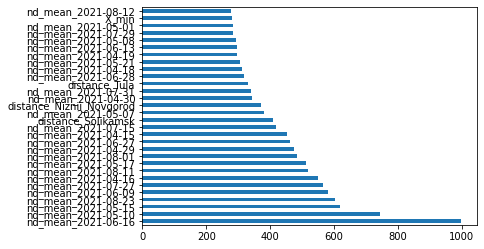

In [45]:
(pd.Series(model.feature_importances_, index=X_train_boruta_shap.columns).nlargest(30).plot(kind='barh'))  
plt.show()

In [46]:
df_test['crop']=predict


In [47]:
df_test[['id','crop']].to_csv('submission_cp.csv', index = False)

In [48]:
df_test.crop.value_counts()

5    327
3    309
6    308
2    299
1    286
0    276
4    266
Name: crop, dtype: int64